# Checkpoint V1 - pré-processamento

1. Definir valores NA "#NULO!" (ok)
2. Unificar colunas e linhas (ok)
3. Converter valores numéricos com vírgula para ponto (ok)
4. Transformar valores descritivos em categóricos com códigos (ok)
5. Dropar colunas/linhas com NA que não irão auxiliar (ok)
6. Preencher valores NA de colunas mantidas (ok)
7. Transformar colunas descritivas em categoria (radicais de palavras, centralizar problemas) (ok, manual)

# Checkpoint V1 - predição

### Exaustão: baixa (< 2,0) média (2,1 a 3,19) alta (> 3,2)
### Cinismo: baixa (< 1,0) média (1,11 a 2,1) alta (> 2,2)
### Engajamento: baixa (< 4,0) média (4,01 a 4,99) alta (> 5)

* 1. Determinar a classificação dos indivíduos com diferentes hipóteses
* 1.1. Com Exaustao e Cinismo abaixo da média e Engagement acima da média
* 1.2. Com Exaustão ou Cinismo altos (abaixo da média)
* 1.3. Com qualquer um dos escores altos
* 2. Selecionar método de classificação
* 3. Aferir a qualidade e realizar comparações
* 4. Plotar gráficos de resultados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_features_pre_processed = pd.read_csv('dataset_filled_and_filtered.csv')

In [ ]:
# Remova as colunas calculadas intermediárias, mantenha apenas as colunas que representam respostas diretas

# trab_cols = ['trab'+str(i) for i in range(1, 33)]
# atitrab_cols = ['atitrab'+str(i) for i in range(1, 21)]
# be_cols = ['be'+str(i) for i in range(1, 20)]
# bes_cols = ['bes'+str(i) for i in range(1, 6)]
# saude_cols = ['saude'+str(i) for i in range(1, 5)]

# df_features_pre_processed = df_features_pre_processed.drop(columns=trab_cols+atitrab_cols+be_cols+bes_cols+saude_cols)
# df_features = df_joined_cats.drop(columns=trab_cols+atitrab_cols+be_cols+bes_cols+saude_cols)len()
df_features_pre_processed.columns

In [2]:
# Implementação das três hipóteses

_EXA_COL = 'Exaustao'
_CIN_COL = 'Cinismo'
_ENG_COL = 'Engagement'
_SCV_COL = 'SCV'

# _MEAN_E = df_features_pre_processed[_EXA_COL].median()
# _MEAN_C = df_features_pre_processed[_CIN_COL].median()
# _MEAN_G = df_features_pre_processed[_ENG_COL].median()
# _MEAN_SCV = df_features_pre_processed[_SCV_COL].median()

_MIN_E = 3.2
_MIN_C = 2.2
_MIN_G = 4

# Gereric rules
def add_rule(who, rules):
    
    global df_features_pre_processed
    
    if who in df_features_pre_processed.columns:
        df_features_pre_processed.drop(columns=[who], inplace=True)

    where = len(df_features_pre_processed.columns)
    what = df_features_pre_processed.apply(rules, axis=1)
    
    df_features_pre_processed.insert(where, who, what)


    
    
# 1.1

# burnout_classification_rules = lambda x: x[_EXA_COL] > _MEAN_E and x[_CIN_COL] > _MEAN_C and x[_ENG_COL] < _MEAN_G
# burnout_classification_rules = lambda x: x[_EXA_COL] > _MIN_E and x[_CIN_COL] > _MIN_C and x[_ENG_COL] < _MIN_G

# add_rule('Burnout', burnout_classification_rules)

burnout_classification_rules = lambda x: x[_EXA_COL] > _MIN_E or x[_CIN_COL] > _MIN_C

add_rule('Burnout_E_or_C', burnout_classification_rules)


# 1.2

# burnout_classification_rules = lambda x: x[_EXA_COL] > _MIN_E or x[_ENG_COL] < _MIN_G

# add_rule('Burnout_EorG', burnout_classification_rules)

# 1.3

# burnout_classification_rules = lambda x: x[_CIN_COL] > _MIN_C or x[_ENG_COL] < _MIN_G

# add_rule('Burnout_GorC', burnout_classification_rules)


# 1.4

# burnout_classification_rules = lambda x: x[_EXA_COL] > _MEAN_E or x[_CIN_COL] > _MEAN_C
burnout_classification_rules = lambda x: x[_EXA_COL] > _MIN_E and x[_CIN_COL] > _MIN_C

add_rule('Burnout_E+C', burnout_classification_rules)

# 1.5

# burnout_classification_rules = lambda x: x[_EXA_COL] > _MEAN_E or x[_CIN_COL] > _MEAN_C or x[_ENG_COL] < _MEAN_G
# burnout_classification_rules = lambda x: x[_EXA_COL] > _MIN_E or x[_CIN_COL] > _MIN_C or x[_ENG_COL] < _MIN_G

# add_rule('Burnout_ANY', burnout_classification_rules)

# 1.6

# burnout_classification_rules = lambda x: x[_EXA_COL] > _MIN_E and x[_ENG_COL] < _MIN_G

# add_rule('Burnout_EG', burnout_classification_rules)

# 1.7

# burnout_classification_rules = lambda x: x[_CIN_COL] > _MIN_C and x[_ENG_COL] < _MIN_G

# add_rule('Burnout_CG', burnout_classification_rules)

# 1.8

burnout_classification_rules = lambda x: x[_CIN_COL] > _MIN_C

add_rule('Burnout_C', burnout_classification_rules)

# 1.9

# burnout_classification_rules = lambda x: x[_ENG_COL] < _MIN_G

# add_rule('Burnout_G', burnout_classification_rules)

# 1.10

burnout_classification_rules = lambda x: x[_EXA_COL] > _MIN_E

add_rule('Burnout_E', burnout_classification_rules)

In [3]:
for c in filter(lambda x : 'Burnout' in x, df_features_pre_processed.columns):
    print(c, len(df_features_pre_processed[df_features_pre_processed[c] == True]) / len(df_features_pre_processed) * 100)

Burnout_E_or_C 41.63727959697733
Burnout_E+C 10.201511335012595
Burnout_C 12.040302267002518
Burnout_E 39.79848866498741


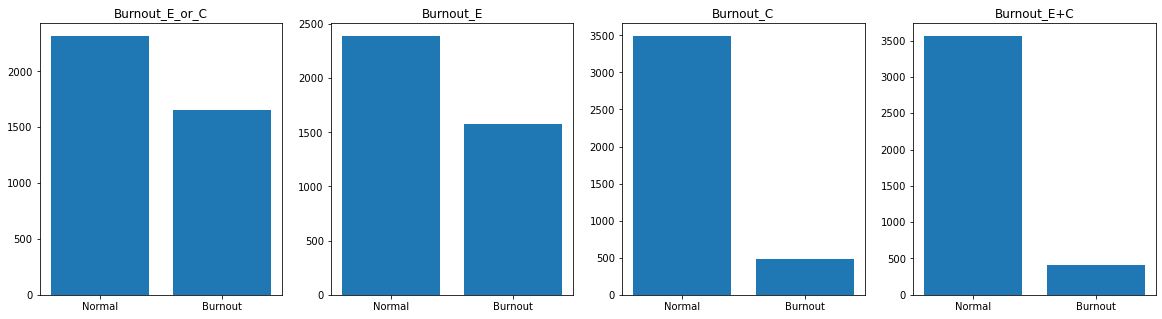

In [4]:
# Qual das três hipóteses parece ser a mais promissora?

rules = dict()

for c in filter(lambda x : 'Burnout' in x, df_features_pre_processed.columns):
    rules[c] = df_features_pre_processed[c].value_counts().sort_index().values

# print(rules)
i, j, count = 0,0,0
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

r = axes[0].bar(['Normal', 'Burnout'], rules['Burnout_E_or_C'])
axes[0].set_title('Burnout_E_or_C')
# axes.bar_label(axes[0])
# axes[0].set_xticks(np.arange(len(rules)))
# axes[0].bar_label(r, padding=3)
axes[3].bar(['Normal', 'Burnout'], rules['Burnout_E+C'])
axes[3].set_title('Burnout_E+C')
axes[2].bar(['Normal', 'Burnout'], rules['Burnout_C'])
axes[2].set_title('Burnout_C')
axes[1].bar(['Normal', 'Burnout'], rules['Burnout_E'])
axes[1].set_title('Burnout_E')

# for k in rules.keys():
    # if j == 2:
        # j = 0
        # i = 1
    # axes[i].bar(['Normal', 'Burnout'], rules[k])
    # axes[i].set_title(k)
    # axes[i].bar(['Normal', 'Burnout'], rules[k])
    # axes[i].set_title(k)
    # i += 1
    
plt.show()

# plt.figure(figsize=(10,6))
# plt.bar(['Sem Burnout', 'Com Burnout'], rule1)
# plt.title('Classificação de Burnout')
# plt.show()

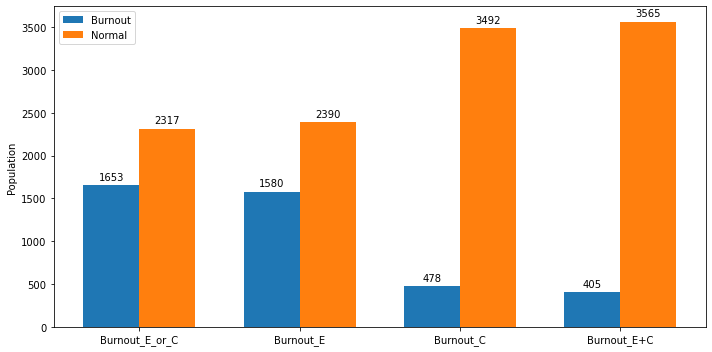

In [5]:
labels = ['Burnout_E_or_C', 'Burnout_E', 'Burnout_C', 'Burnout_E+C']

burnout_values = []
normal_values = []

for l in labels:
    burnout_values.append(len(df_features_pre_processed[df_features_pre_processed[l] == True]))
    normal_values.append(len(df_features_pre_processed[df_features_pre_processed[l] == False]))

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))

rects1 = ax.bar(x - width/2, burnout_values, width, label='Burnout')
rects2 = ax.bar(x + width/2, normal_values, width, label='Normal')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Population')
# ax.set_title('Population labeled as Burnout by Hypothesis')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.savefig('burned_out.png')

plt.show()

In [ ]:
# df_features_pre_processed = df_features_pre_processed.drop(columns=['Burnout'])

In [ ]:
# print(_MEAN_E, _MEAN_C, _MEAN_G)
# df_features_pre_processed = df_features_pre_processed.drop(columns=['IdadeCat', 'NrProfCat'])

In [ ]:
from sklearn.preprocessing import normalize

df_norm = pd.DataFrame(normalize(df_features_pre_processed, copy=True))
df_norm

In [16]:
# Utilize uma Random Forest para classificar os indivíduos. Verifique o resultado com 10-fold cross-validation

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import average_precision_score, precision_recall_fscore_support, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

scores = dict()
classifiers = dict()
BETA = 2.0

for c in filter(lambda x : 'Burnout' in x, df_features_pre_processed.columns):
    
    df_feat_no_class = df_features_pre_processed.drop(columns=[c for c in df_features_pre_processed if 'Burnout' in c])
        
    TARGET_CLASS = c
    
    # Dropa as colunas que estão diretamente relacionadas ao preditor
    # if 'C' in TARGET_CLASS or 'E' in TARGET_CLASS:
    if 'C' in TARGET_CLASS:
        df_feat_no_class = df_feat_no_class.drop(columns=[_CIN_COL])
    if 'E' in TARGET_CLASS:
        df_feat_no_class = df_feat_no_class.drop(columns=[_EXA_COL])
        # if 'G' in TARGET_CLASS:
            # df_feat_no_class = df_feat_no_class.drop(columns=[_ENG_COL])
    # else:
        # df_feat_no_class = df_feat_no_class.drop(columns=[_CIN_COL, _EXA_COL, _ENG_COL])
        
    scores[c] = dict()

    X_train, X_test, y_train, y_test = train_test_split(df_feat_no_class, df_features_pre_processed[TARGET_CLASS], stratify=df_features_pre_processed[TARGET_CLASS], test_size=0.33)

    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    preds = rfc.predict(X_test)
    average_precision = precision_recall_fscore_support(y_test, preds, average='macro', zero_division=0, beta=BETA)
    cross_scores = cross_val_score(rfc, df_feat_no_class.values, df_features_pre_processed[TARGET_CLASS], cv=10)
    # scores[c] = {'accuracy' : cross_scores.mean(), 'precision' : average_precision[0], 'recall' : average_precision[1], 'f1' : average_precision[2], 'population' : y_test.sum()}
    scores[c]['random_forest'] = {'accuracy' : cross_scores.mean(), 'precision' : average_precision[0], 'recall' : average_precision[1], 'f1' : average_precision[2], 'population' : y_test.sum()}
           
    logreg = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
    preds = logreg.predict(X_test)
    average_precision = precision_recall_fscore_support(y_test, preds, average='macro', zero_division=0, beta=BETA)    
    cross_scores = cross_val_score(logreg, df_feat_no_class.values, df_features_pre_processed[TARGET_CLASS], cv=10)
    scores[c]['log_reg'] = {'accuracy' : cross_scores.mean(), 'precision' : average_precision[0], 'recall' : average_precision[1], 'f1' : average_precision[2], 'population' : y_test.sum()}
    
    gradclf = GradientBoostingClassifier(n_estimators=100, random_state=0)
    gradclf.fit(X_train, y_train)    
    preds = gradclf.predict(X_test)
    average_precision = precision_recall_fscore_support(y_test, preds, average='macro', zero_division=0, beta=BETA)    
    cross_scores = cross_val_score(gradclf, df_feat_no_class.values, df_features_pre_processed[TARGET_CLASS], cv=10)
    scores[c]['grad_boost'] = {'accuracy' : cross_scores.mean(), 'precision' : average_precision[0], 'recall' : average_precision[1], 'f1' : average_precision[2], 'population' : y_test.sum()}
    
    mlp = MLPClassifier(random_state=1, activation='tanh', max_iter=1000, solver='adam', hidden_layer_sizes=(100,1)).fit(X_train, y_train)
    preds = mlp.predict(X_test)
    average_precision = precision_recall_fscore_support(y_test, preds, average='macro', zero_division=0, beta=BETA)
    cross_scores = cross_val_score(mlp, df_feat_no_class.values, df_features_pre_processed[TARGET_CLASS], cv=10)
    scores[c]['mlp'] = {'accuracy' : cross_scores.mean(), 'precision' : average_precision[0], 'recall' : average_precision[1], 'f1' : average_precision[2], 'population' : y_test.sum()}
    
    classifiers[c] = (rfc, logreg, gradclf, mlp)
        


In [ ]:
 #scores

# for k in rules:
#     print(k, rules[k][1] / sum(rules[k]))

# df_feat_no_class.columns
for c in df_feat_no_class.columns:
    print(c, end='\t')

In [17]:
import pprint

pprint.pprint(scores)
# pprint.pprint({k: v for k, v in sorted(scores.items(), key=lambda item: item['accuracy'])})
# scores

{'Burnout_C': {'grad_boost': {'accuracy': 0.8725440806045339,
                              'f1': 0.6273110211157915,
                              'population': 158,
                              'precision': 0.7330744336569579,
                              'recall': 0.6186008980425308},
               'log_reg': {'accuracy': 0.8833753148614608,
                           'f1': 0.5958049886621315,
                           'population': 158,
                           'precision': 0.7983640231824518,
                           'recall': 0.5892992413846103},
               'mlp': {'accuracy': 0.8551637279596976,
                       'f1': 0.6938602209787533,
                       'population': 158,
                       'precision': 0.6810513078470826,
                       'recall': 0.6975748460263265},
               'random_forest': {'accuracy': 0.881360201511335,
                                 'f1': 0.5580287076062064,
                                 'population': 158,
  

In [ ]:
# print(scores, scores.mean())

# df_feat_no_class = df_features_pre_processed.drop(columns=[c for c in df_features_pre_processed if 'Burnout' in c] + ['Escola_resp_Quest', 'NomeEscola', 'Escolcod'] + drop_this_too)
# df_feat_no_class = df_features_pre_processed.drop(columns=[c for c in df_features_pre_processed if 'Burnout' in c] + ['Escola_resp_Quest', 'Escolcod'] + drop_this_too)

df_feat_no_class = df_features_pre_processed.drop(columns=[c for c in df_features_pre_processed if 'Burnout' in c])
# df_feat_no_class = df_feat_no_class.drop(columns=[_EXA_COL, _ENG_COL])
df_feat_no_class = df_feat_no_class.drop(columns=[_EXA_COL])

TARGET_CLASS = 'Burnout_E'
# TARGET_CLASS = 'Burnout_E'

X_train, X_test, y_train, y_test = train_test_split(df_feat_no_class, df_features_pre_processed[TARGET_CLASS], stratify=df_features_pre_processed[TARGET_CLASS], test_size=0.33)



In [ ]:
# Classificador 2

df_feat_no_class = df_features_pre_processed.drop(columns=[c for c in df_features_pre_processed if 'Burnout' in c])
# df_feat_no_class = df_feat_no_class.drop(columns=[_EXA_COL, _ENG_COL])
df_feat_no_class = df_feat_no_class.drop(columns=[_EXA_COL])
TARGET_CLASS = 'Burnout_E'
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_feat_no_class, df_features_pre_processed[TARGET_CLASS], stratify=df_features_pre_processed[TARGET_CLASS], test_size=0.36)

rfc2 = RandomForestClassifier(random_state = 0)
rfc2.fit(X_train2, y_train2)

preds2 = rfc2.predict(X_test2)
average_precision = precision_recall_fscore_support(y_test2, preds2, average='macro', zero_division=0)
print('Precision:', average_precision[0], 'Recall:', average_precision[1], 'fBeta: ', average_precision[2])

In [22]:
TARGET_CLASS = 'Burnout_E'

X_train, X_test, y_train, y_test = train_test_split(df_feat_no_class, df_features_pre_processed[TARGET_CLASS], stratify=df_features_pre_processed[TARGET_CLASS], test_size=0.33)

classifiers['Burnout_E']

(RandomForestClassifier(),
 LogisticRegression(max_iter=1000, random_state=0),
 GradientBoostingClassifier(random_state=0),
 MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 1), max_iter=1000,
               random_state=1))

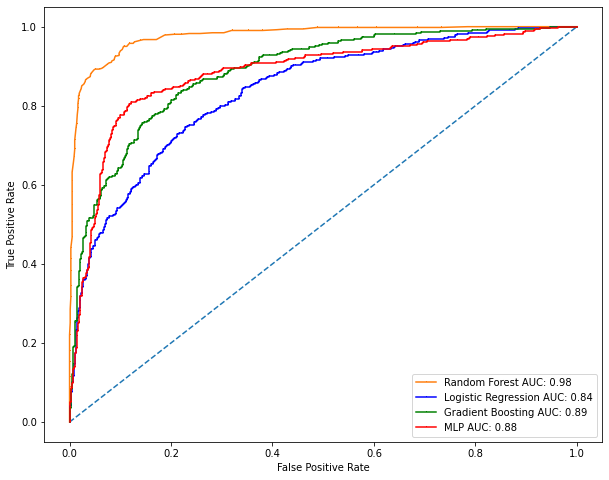

In [72]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from matplotlib import pyplot

rfc2 = classifiers['Burnout_E'][0]
logr = classifiers['Burnout_E'][1]
grad = classifiers['Burnout_E'][2]
mlpc = classifiers['Burnout_E'][3]

probs = rfc2.predict_proba(X_test)
probs_logr = logr.predict_proba(X_test)
probs_grad = grad.predict_proba(X_test)
probs_mlpc = mlpc.predict_proba(X_test)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = rfc2.predict_proba(X_test)
lr_probs_logr = logr.predict_proba(X_test)
lr_probs_grad = grad.predict_proba(X_test)
lr_probs_mlpc = mlpc.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs_logr = lr_probs_logr[:, 1]
lr_probs_grad = lr_probs_grad[:, 1]
lr_probs_mlpc = lr_probs_mlpc[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
lr_auc_logr = roc_auc_score(y_test, lr_probs_logr)
lr_auc_grad = roc_auc_score(y_test, lr_probs_grad)
lr_auc_mlpc = roc_auc_score(y_test, lr_probs_mlpc)

# summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_fpr_logr, lr_tpr_logr, _ = roc_curve(y_test, lr_probs_logr)
lr_fpr_grad, lr_tpr_grad, _ = roc_curve(y_test, lr_probs_grad)
lr_fpr_mlpc, lr_tpr_mlpc, _ = roc_curve(y_test, lr_probs_mlpc)

pyplot.figure(figsize=(10,8))
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, marker=',', label='Random Forest AUC: '+str(round(lr_auc, 2)))
pyplot.plot(lr_fpr_logr, lr_tpr_logr, marker=',', color='blue', label='Logistic Regression AUC: '+str(round(lr_auc_logr, 2)))
pyplot.plot(lr_fpr_grad, lr_tpr_grad, marker=',', color='green', label='Gradient Boosting AUC: '+str(round(lr_auc_grad, 2)))
pyplot.plot(lr_fpr_mlpc, lr_tpr_mlpc, marker=',', color='red', label='MLP AUC: '+str(round(lr_auc_mlpc, 2)))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
plt.savefig('roc_curve.png')
pyplot.show()

# y_score = rfc2.fit(X_train, y_train).predict_proba(X_test)

# print(roc_auc_score(y_test, clf.predict_proba(X_test)))

# Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(2):
#     fpr[i], tpr[i], _ = roc_curve(y_test2[:, i], y_score[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

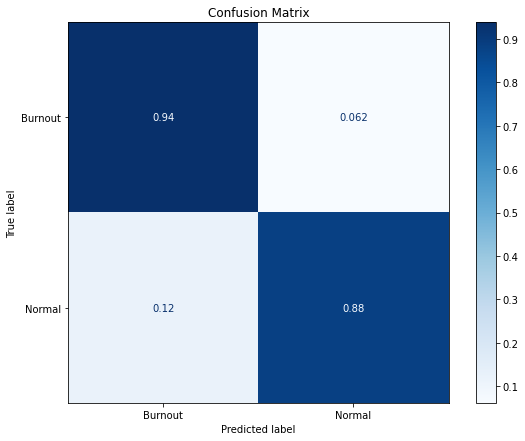

In [26]:
# plt.figure(figsize=(15,7))
fig, ax = plt.subplots(figsize=(10, 7))
disp = plot_confusion_matrix(rfc2, X_test, y_test, display_labels=['Burnout', 'Normal'], cmap=plt.cm.Blues, normalize='true', ax=ax)
disp.ax_.set_title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()  

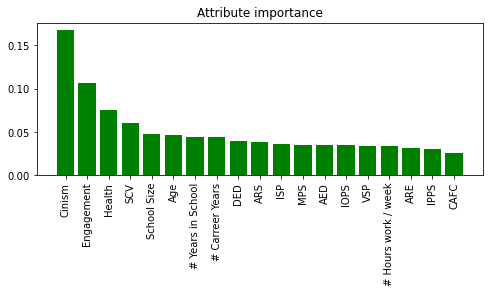

In [71]:
# Quais atributos são mais importantes?

c = 'Burnout_E'
rfc2 = classifiers[c][0]

df_feat_no_class_renamed = df_feat_no_class.rename(columns={'Cinismo': 'Cinism', 'Saude' : 'Health', 'TAMesc' : 'School Size', 'Idade' : 'Age', 'Tempo_profissão' : '# Carreer Years', 'Tempo_Escola' : '# Years in School', 'Hrs_semanais' : '# Hours work / week'})

fi = pd.DataFrame({'feature': list(df_feat_no_class_renamed.columns),
                   'importance': rfc2.feature_importances_}).\
                    sort_values('importance', ascending = False)

# print(fi[fi.importance > fi.importance.mean()/2].importance)
select = fi[fi.importance > fi.importance.mean()/2]

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(select.feature, select.importance.values, align='center', color='green', ecolor='black')
plt.title('Attribute importance')
plt.xticks(rotation=90)
plt.gcf().subplots_adjust(bottom=0.35)
plt.savefig('attribute_importance.png', format='png')
plt.show()

In [56]:
# df_feat_no_class = df_feat_no_class.drop(columns=['IdadeCat', 'NrProfCat'])
# df_features_pre_processed.drop(columns=['Burnout_EorC', 'Burnout_GorC', 'Burnout_EC', 'Burnout_ANY', 'Burnout_EG', 'Burnout_CG', 'Burnout_C', 'Burnout_G']).to_csv('dataset_with_class.csv', index=False)
# df_features_pre_processed.drop(columns=['Burnout_E_or_C', 'Burnout_E+C', 'Burnout_C', 'Burnout_E']).to_csv('dataset_with_class.csv', index=False)
df_features_pre_processed.drop(columns=['Burnout_E_or_C', 'Burnout_E+C', 'Burnout_C']).to_csv('dataset_with_class.csv', index=False)

# Plot da Árvore

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# TARGET_CLASS = 'Burnout_EorG'
TARGET_CLASS = 'Burnout_E'

df_feat_no_class_renamed = df_feat_no_class.rename(columns={'Cinismo': 'Cinism', 'Saude' : 'Health', 'TAMesc' : 'School Size', 'Idade' : 'Age', 'Tempo_profissão' : '# Carreer Years', 'Tempo_Escola' : '# Years in School', 'Hrs_semanais' : '# Hours work / week'})

# selected_cols = ['SCV', 'Saude', 'Idade', 'AED']
selected_cols = df_feat_no_class_renamed.columns # ['Cinismo', 'VSP', 'SCV', 'Saude', 'Idade', 'AED', 'IOPS', 'ISP', 'Indiv']
# selected_cols = ['Cinismo', 'Saude', 'SCV', 'Idade', 'Numero_professores', 'ARS', 'Tempo_profissão', 'Tempo_Escola', 'DED', 'AED', 'IOPS', 'MPS', 'ISP']

X_train, X_test, y_train, y_test = train_test_split(df_feat_no_class_renamed, df_features_pre_processed[TARGET_CLASS], stratify=df_features_pre_processed[TARGET_CLASS], test_size=0.33)

clf = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=200)
clf.fit(X_train[selected_cols], y_train)
preds = clf.predict(X_test[selected_cols])

scores = cross_val_score(clf, df_feat_no_class_renamed[selected_cols], df_features_pre_processed.Burnout_E, cv=10, scoring='accuracy')
average_precision = precision_recall_fscore_support(y_test, preds, average='macro')

print(scores.mean(), average_precision)

0.7335012594458438 (0.7299365792087402, 0.7158486662878953, 0.7202004443224084, None)


In [ ]:
df_feat_no_class_renamed.describe()

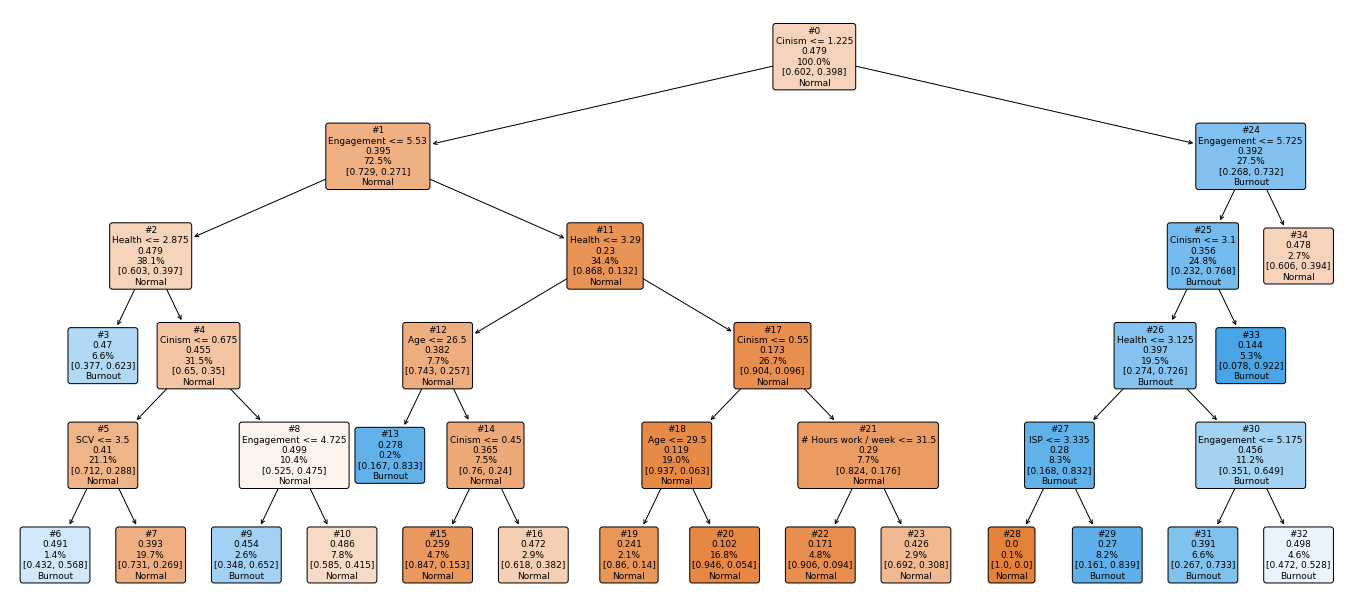

In [73]:
plt.figure(figsize=(24,11))
plt.title('teste')
tree.plot_tree(clf, label=None, node_ids=True, rounded=True, fontsize=9, feature_names=X_train[selected_cols].columns, filled=True, class_names=["Normal", "Burnout"], proportion=True)
plt.savefig('decision_tree.png', format='png')
plt.show()

# Burnout por idade

In [ ]:
# Executar isso apenas uma vez:

if 'IdadeCat' in df_features_pre_processed.columns: # and 'NrProfCat' in df_features_pre_processed.columns:
    # df_features_pre_processed = df_features_pre_processed.drop(columns=['IdadeCat', 'NrProfCat'])
    df_features_pre_processed = df_features_pre_processed.drop(columns=['IdadeCat'])
else:
    aaa = pd.cut(df_features_pre_processed.Idade, [0, 24, 34, 44, 54, 64, 100], labels=["até 24", "24 a 34", "34 a 44", "44 a 54", "54 a 64", "Mais que 64"])
    df_features_pre_processed.insert(len(df_features_pre_processed.columns), "IdadeCat", aaa)
    # bbb = pd.cut(df_features_pre_processed.Numero_professores, [0, 36, 72, 108, 144, 200], labels=["até 36", "36 a 72", "72 a 108", "108 a 144", "Mais que 144"])
    # df_features_pre_processed.insert(len(df_features_pre_processed.columns), "NrProfCat", bbb)

In [ ]:
plt.figure(figsize=(12,7))

dfg = df_features_pre_processed[df_features_pre_processed[TARGET_CLASS]==1][["IdadeCat", TARGET_CLASS]].groupby(by=["IdadeCat"]).count()
dfg2 = df_features_pre_processed[df_features_pre_processed[TARGET_CLASS]==0][["IdadeCat", TARGET_CLASS]].groupby(by=["IdadeCat"]).count()

_x_axis = list(dfg.index)

plt.plot(_x_axis, dfg.values, 'r--', _x_axis, dfg2.values, 'b--')
plt.legend(('Burnout', 'Normal'))
plt.show()

In [ ]:
import numpy as np

plt.figure(figsize=(12,10))

ind = np.arange(len(_x_axis))
width = 0.35

p1 = plt.bar(ind, dfg.values.ravel())
p2 = plt.bar(ind, dfg2.values.ravel(), bottom=dfg.values.ravel())

plt.ylabel('Total')
plt.title('Burnout por Idade')
plt.xticks(ind, tuple(_x_axis))
plt.yticks()
plt.legend((p1[0], p2[0]), ('Normal', 'Burnout'))

plt.show()

In [ ]:
dfg2.values[1][0]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calc_cats(x):
    
    global dfg, dfg2
    
    return [dfg.values[x][0] / (dfg.values[x][0] + dfg2.values[x][0]) * 100, dfg2.values[x][0] / (dfg.values[x][0] + dfg2.values[x][0]) * 100]

category_names = ['Burnout', 'Normal']
results = {
    'To 24': calc_cats(0),
    'From 24 to 34': calc_cats(1),
    'From 34 to 44': calc_cats(2),
    'From 44 to 54': calc_cats(3),
    'From 54 to 64': calc_cats(4),
    'More than 64': calc_cats(5)
}


def survey(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.title('Burnout by age', pad=40)
plt.savefig('burnout_age.png')
plt.show()

# survey(results, category_names)
# plt.title('Proporção de pessoas Com Burnout e Sem Burnout por idade', pad=40)

In [ ]:
burnout_chance = dfg / (dfg + dfg2)
plt.bar(_x_axis, burnout_chance.values.reshape(-1))
plt.show()

In [ ]:
# Dez/2019: classificação
import seaborn as sns

x = df_features_pre_processed.iloc[0]
# x.Exaustao * x.Cinismo * x.SCV
this_cols = ['Engagement', 'Exaustao', 'Cinismo', 'SCV', 'Idade', 'Saude', 'TAMesc', 'Tempo_Escola']
# this_cols = df_features_pre_processed.columns
corr = df_features_pre_processed[list(df_feat_no_class.columns) + ['Engagement', 'Exaustao']].corr()
# print(corr)
plt.figure(figsize=(21,13))
sns.heatmap(corr, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .5},  annot=True)
plt.show()
# O melhor método para fazer a predição de Burnout dentre as hipóteses levantadas parece ser a combinação de Engagement, Cinismo e Exaustao porque gera uma população de cerca de 35% com Burnout.
# SCV, Saude e AED são os três preditores mais fortes de Burnout. Em seguida temos Idade e Numero de Professores na Escola.
# Há uma correlação alta entre os três preditores fortes e Engagement.
# Random Forest prediz Burnout com uma acurácia média de 71%.

In [ ]:
df_features_pre_processed[df_features_pre_processed['Saude'] < 10].boxplot(column=['SCV', 'Saude', 'Cinismo'])
plt.show()

df_features_pre_processed['SaudeD'] = pd.qcut(df_features_pre_processed['Saude'], q=4)
df_features_pre_processed['SCVD'] = pd.qcut(df_features_pre_processed['SCV'], q=4)
# print(df_features_pre_processed.columns)
df_features_pre_processed['TAMescD'] = pd.qcut(df_features_pre_processed['TAMesc'], q=5)
df_features_pre_processed['ExaustaoD'] = pd.qcut(df_features_pre_processed['Exaustao'], q=5)
# print(df_features_pre_processed['Saude'].describe())

# df_features_pre_processed.groupby()
# print(pd.crosstab(df_features_pre_processed['Burnout_GorC'], df_features_pre_processed['SaudeD'], normalize=True))

# print(pd.crosstab(df_features_pre_processed['Burnout_GorC'], df_features_pre_processed['SCVD'], normalize=True))
n = pd.crosstab(df_features_pre_processed['Burnout_GorC'], df_features_pre_processed['TAMescD'], normalize=True)
n.T[True].plot.bar()
plt.show()

nn = pd.crosstab(df_features_pre_processed['ExaustaoD'], df_features_pre_processed['TAMescD'], normalize=True)
# df_features_pre_processed['TAMescD'].unique()

# print(, nn.values.shape)

print(nn.values)
ls = [str(a) for a in df_features_pre_processed['TAMescD'].unique().categories.values]
# print(df_features_pre_processed['TAMescD'].unique().categories)
print(ls)

# nn.plot.scatter(x='SaudeD', y='TAMescD')
df1 = pd.DataFrame(nn.values, index=ls) 
df1
# df1.plot.scatter(x)

In [ ]:
print(len(df_features_pre_processed.where(df_features_pre_processed['Tempo_Escola'] > 6)))
# print(len(df_features_pre_processed[df_features_pre_processed['Tempo_Escola'] > 6]))
# print(len(df_features_pre_processed.where(df_features_pre_processed['Tempo_Escola'] > 6).dropna()))
# df_features_pre_processed[1]

In [ ]:
print(len(df_features_pre_processed['Idade'] > 20))
print(len(df_features_pre_processed[(df_features_pre_processed['Idade'].isin(range(20,40)))]))